# Quantum Engineering: Qiskit Simulations

_Leandro Risso Venâncio  -  ESPCI Paris  -  2022/2023_

---

In [439]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, Aer
import qiskit.visualization as qvis
import qiskit.quantum_info as qi


import qiskit.tools.jupyter
%qiskit_version_table
%matplotlib inline

## A. Custom Functions

In [442]:
def systemEvolve(qc):

    # 2. Transpile circuit for simulator
    sim = Aer.get_backend('statevector_simulator') # returns the final quantum state
    qc = transpile(qc, sim) # compile the circuit for simulation

    # 3. Run
    result = sim.run(qc).result()
    out_state = result.get_statevector(qc)

    return out_state

---

# Simulation

## Exercise 1

Program a 1-qubit quantum circuit outputting a superposition state $\frac{1}{\sqrt{2}} \left(|0 \rangle + | 1 \rangle \right)$ when the initial state is $|0 \rangle$.

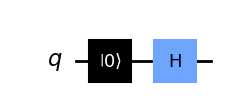

In [471]:
# Initializing circuit with 1 qubit in the zero state
qc = QuantumCircuit(1)
qc.reset(0)

# Saving the initial state
state_0 = qi.Statevector(qc)

# Adding a Hadamard Gate to the circuit to create superposition
qc.h(0)

# Saving the final state
state_f = qi.Statevector(qc)

# Visualizing the circuit
qc.draw(output='mpl')

Visualize the circuit, the initial quantum state and the final quantum state in the Bloch sphere.

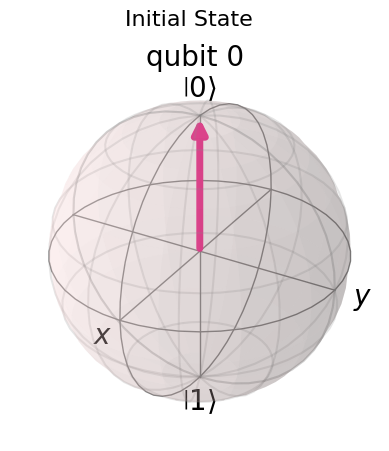

In [472]:
# Visualizing the Initial state
qvis.plot_bloch_multivector(state_0, title='Initial State')

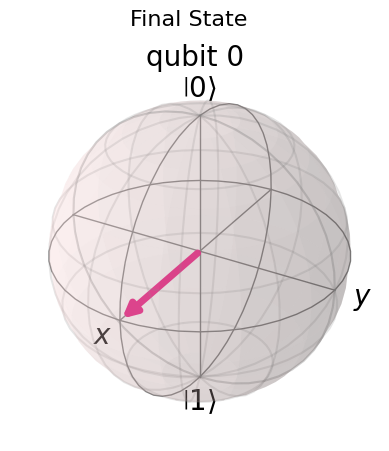

In [474]:
# Visualizing the Final state
qvis.plot_bloch_multivector(state_f, title='Final State')

## Exercise 2

Program a 1-qubit quantum circuit outputting a superposition state $\frac{1}{\sqrt{2}} \left(|0 \rangle - | 1 \rangle \right)$ when the initial state is $|1 \rangle$.

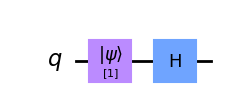

In [476]:
# Initializing circuit with 1 qubit in the one state
qc = QuantumCircuit(1)
qc.initialize('1', qc.qubits)

# Savinig the initial state
state_0 = qi.Statevector(qc)

# Adding a Hadamard Gate to the circuit to create superposition
qc.h(0)

# Saving the final state
state_f = qi.Statevector(qc)

# Visualizing the circuit
qc.draw(output='mpl')

Visualize the circuit, the initial quantum state and the final quantum state in the Bloch sphere.

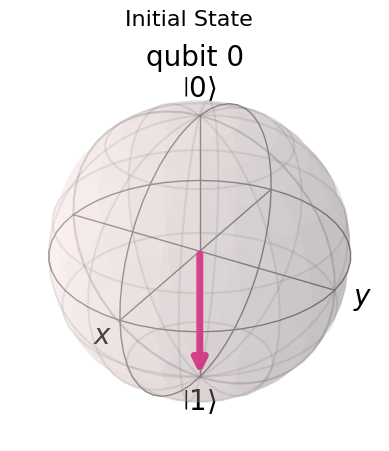

In [478]:
# Visualizing the initial state
qvis.plot_bloch_multivector(state_0, title='Initial State')

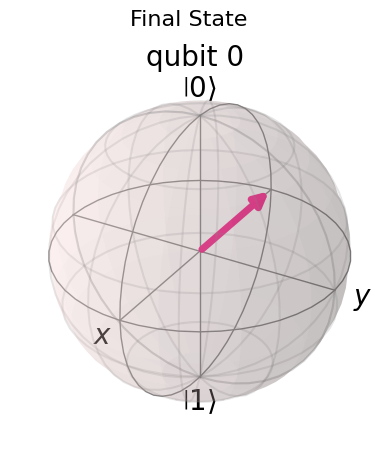

In [479]:
# Visualizing the final state
qvis.plot_bloch_multivector(state_f, title='Final State')

## Exercise 3

Program a 1-qubit quantum circuit inducing a $\pi$-rotation on the state $|0\rangle$ i.e.
outputting $|1\rangle$.

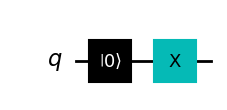

In [481]:
# Initializing circuit with 1 qubit in the zero state
qc = QuantumCircuit(1)
qc.reset(0)

# Saving the initial state
state_0 = qi.Statevector(qc)

# Adding an X Gate to the circuit to flip the qubit
qc.x(0)

# Saving the final state
state_f = qi.Statevector(qc)

# Visualizing the circuit
qc.draw(output='mpl')

 Visualize the circuit, the initial quantum state and the final quantum state in the Bloch sphere.

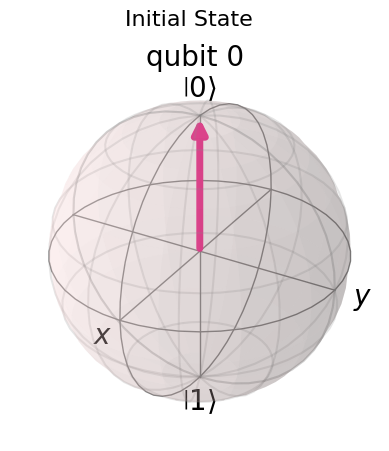

In [482]:
# Visualizing the initial state
qvis.plot_bloch_multivector(state_0, title='Initial State')

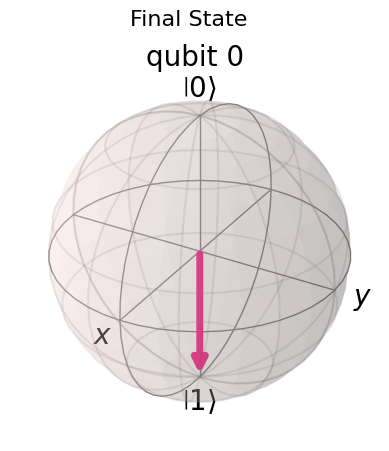

In [483]:
# Visualizing the final state
qvis.plot_bloch_multivector(state_f, title='Final State')

## Exercise 4
Program a 1-qubit quantum circuit outputting a superposition state $1/\sqrt{2} \left(|0 \rangle - | 1 \rangle \right)$ stating from state |0⟩.

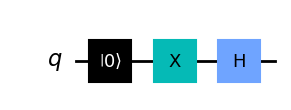

In [486]:
# Initializing circuit with 1 qubit in the zero state
qc = QuantumCircuit(1)
qc.reset(0)

# Saving initial state
state_0 = qi.Statevector(qc)

qc.x(0) # flip
qc.h(0) # superposition

# Saving the final state
state_f = qi.Statevector(qc)

# Visualizing the circuit
qc.draw(output='mpl')

Visualize the circuit, the initial quantum state and the final quantum state in the Bloch sphere.

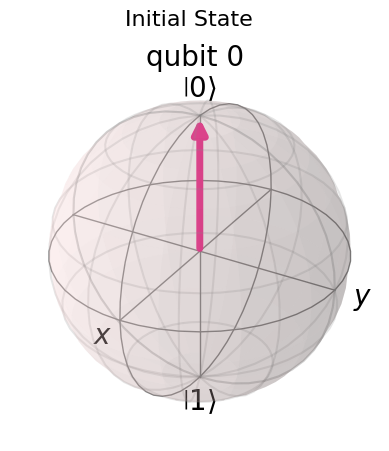

In [487]:
# Visualizing the initial state
qvis.plot_bloch_multivector(state_0, title='Initial State')

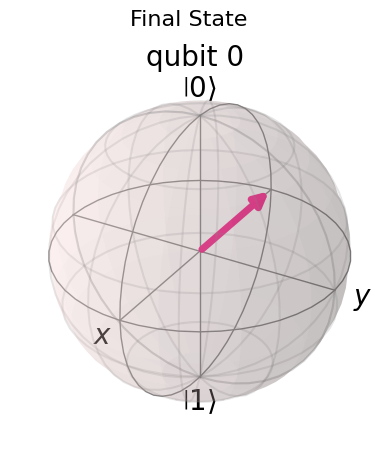

In [488]:
# Visualizing the final state
qvis.plot_bloch_multivector(state_f, title='Final State')

Is this result equal to that of a previous exercise?

> _=> The state is not equal to the state in exercise 3, but it is identical to the state in exercise 2._

## Exercise 5
Program a 2-qubit quantum circuit with a Bell state $\beta_{00}$. Visualize the circuit and use `statename.draw(‘latex’)` to visualize the final state.

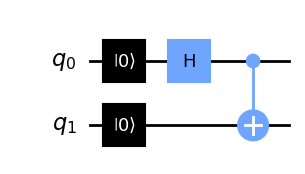

In [496]:
# Initializing circuit with 2 qubit in the zero state, with 2 classical bit set to zero
qc = QuantumCircuit(2)
qc.reset(range(2))

# Saving initial state
state_0 = qi.Statevector(qc)

# Implementing the Bell State Generator Circuit
qc.h(0)
qc.cnot(0, 1) # (control, target)

# Saving final state
state_f = qi.Statevector(qc)

# Visualizing the circuit
qc.draw(output='mpl')

In [497]:
# Print final state
state_f.draw('latex')

<IPython.core.display.Latex object>

Is it possible to visualize the initial state for each qubit in the Bloch sphere?

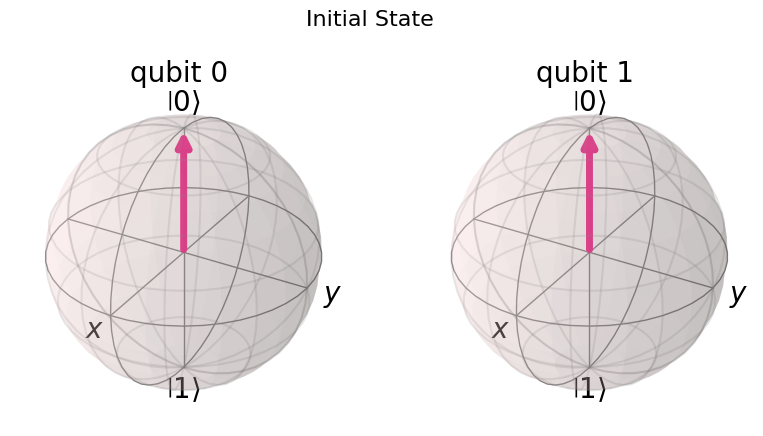

In [498]:
# Visualizing the initial state
qvis.plot_bloch_multivector(state_0, title='Initial State')

> _=> We can observe both qubits in the bloch sphere because they are not entagled (individual qubits in a separable state can be treated independently and their quantum states can be described using separate Bloch spheres)._

And the final state in the Bloch sphere? If not, use the `qsphere` representation.

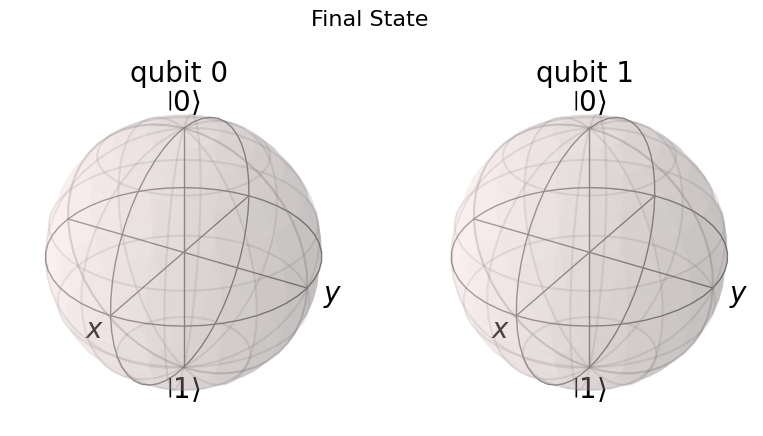

In [510]:
# Visualizing the final state
qvis.plot_bloch_multivector(state_f, title='Final State')

> _=> The entanglement is "visible" in that plot because qubits in a completely entangled state are represented by a point at the origin of the sphere. However, we can visualize the entaglement is using `qsphere`:_

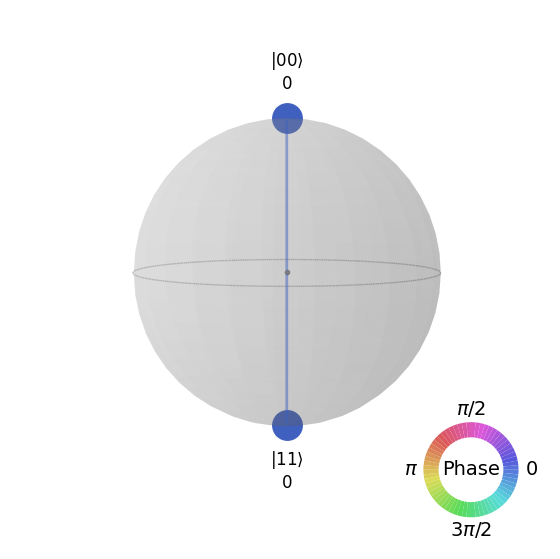

In [500]:
qvis.plot_state_qsphere(state_f, show_state_labels=True, show_state_phases=True, use_degrees=False)

## Exercise 6

Program a 2-qubit quantum circuit with a Bell state $\beta_{01}$. Visualize the circuit, use `statename.draw(‘latex’)` to visualize the final state and the ‘qsphere’ representation.

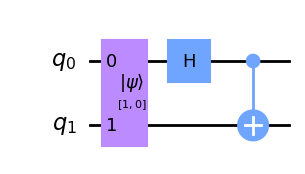

In [501]:
# Initializing circuit with 2 qubit in the zero and one state, with 2 classical bit set to zero
qc = QuantumCircuit(2)
qc.initialize('10', qc.qubits) # (q_1, q_0)

# Saving initial state
state_0 = qi.Statevector(qc)

# Implementing the Bell State Generator Circuit
qc.h(0)
qc.cnot(0, 1)

# Saving final state
state_f = qi.Statevector(qc)

# Visualizing the circuit
qc.draw(output='mpl')

In [502]:
# Print final state
state_f.draw('latex')

<IPython.core.display.Latex object>

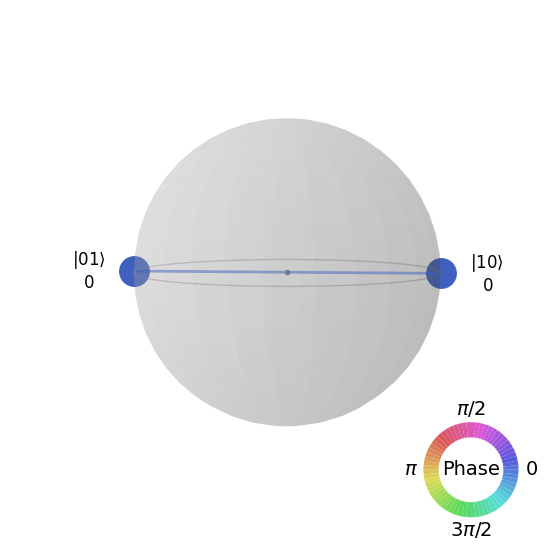

In [503]:
# Visualizing the entagled state
qvis.plot_state_qsphere(state_f, show_state_labels=True, show_state_phases=True, use_degrees=False)

# Exercise 7
Program a quantum circuit including a 3-qubit quantum register and a 3-bit classical register so that the initial state is $|010\rangle$ and the final state is $|001\rangle$. (Note that the qubit order in Qikist’s kets is $|q_3 q_2 q_1 \rangle$ ). Include a measurement for qubits 2 and 3 and send the result through classical registers 2 and 3 respectively. Visualize the final state both in the Bloch Sphere and the Qsphere.

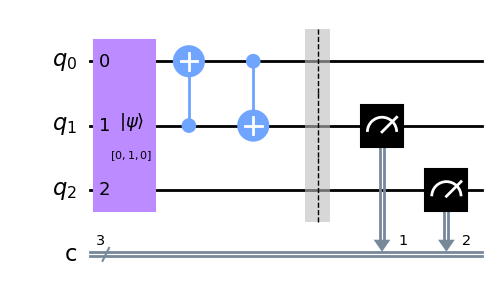

In [511]:
# Initializing circuit with 3 qubit registers and 3 classical registers set to zero
qc = QuantumCircuit(3, 3)
qc.initialize('010', qc.qubits) # (q_2, q_1, q_0)

# Programming the quantum circuit
qc.cnot(1, 0)
qc.cnot(0, 1)
qc.barrier(range(3))

# Measure q_1 and q_2
qc.measure([1, 2], [1, 2])

# Visualizing the circuit
qc.draw(output='mpl')

To simulate the execution of this circuit in an actual device, we run the following code block:

In [512]:
# 1. Create the circuit (above)

# 2. Transpile for simulator
sim = Aer.get_backend('aer_simulator') # mimic the execution of an actual device
qc = transpile(qc, sim) # compile the circuit for simulation
qc.save_statevector() # to save the simulated output state

# 3. Run
result = sim.run(qc).result()

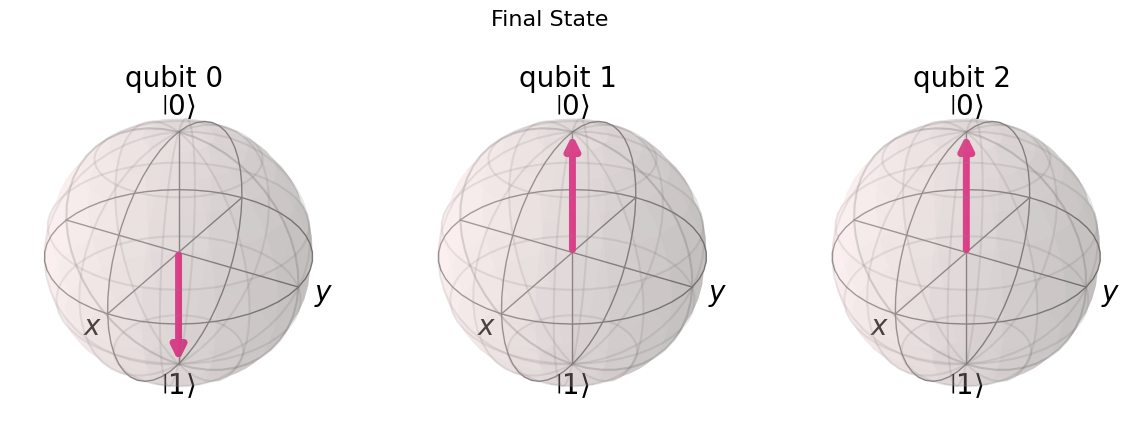

In [513]:
# Get the output state vector (Bloch Sphere)
out_state = result.get_statevector()
qvis.plot_bloch_multivector(out_state, title='Final State')

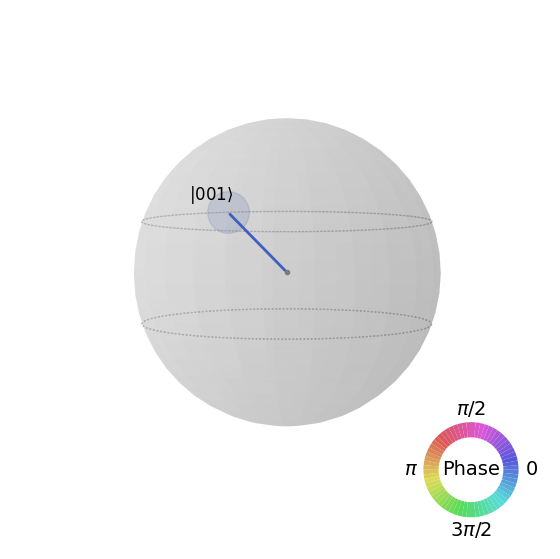

In [514]:
# Get the output state vector (Qsphere)
qvis.plot_state_qsphere(out_state)

Is it a pure state?

> _=> The output state of our system is a pure state._

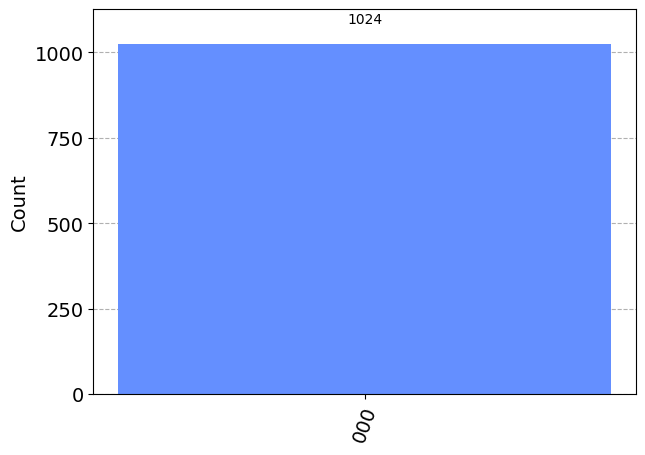

In [515]:
# Returns counts
counts = result.get_counts()
qvis.plot_histogram(counts)

Are the results of the out_vector and counts’ histogram the expected ones from the first part of the exercise, i.e., consistent with the result of `state_evolve(qc)`?

> _=> The count and the output state are not the same. This happens because we are not measuring the first qubit. Let's repeat the simulation, now measuring all qubits:_

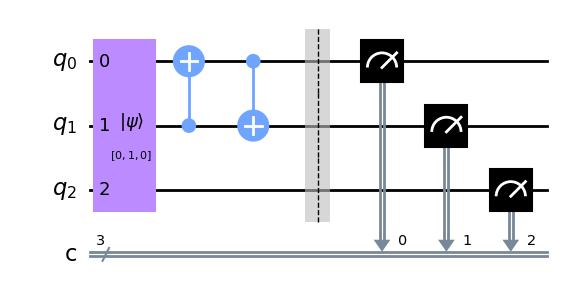

In [516]:
# 1. Programming the QC

qc = QuantumCircuit(3, 3)
qc.initialize('010', qc.qubits) # (q_2, q_1, q_0)

qc.cnot(1, 0)
qc.cnot(0, 1)
qc.barrier(range(3))
qc.measure(range(3), range(3))

qc.draw(output='mpl')

In [517]:
# 2. Transpile for simulator
sim = Aer.get_backend('aer_simulator') # mimic the execution of an actual device
qc = transpile(qc, sim) # compile the circuit for simulation
qc.save_statevector() # To save the simulated output state

# 3. Run
result = sim.run(qc).result()

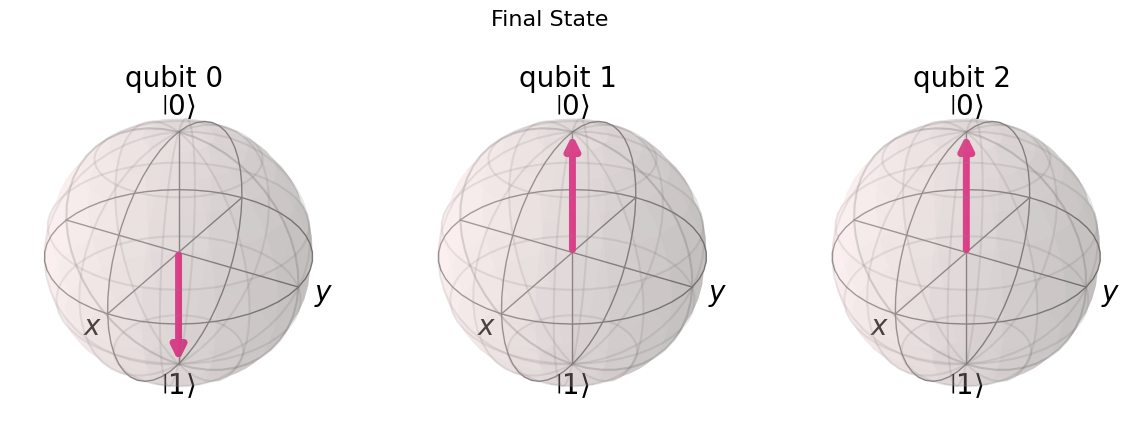

In [519]:
# Get the output state vector (Bloch Sphere)
out_state = result.get_statevector()
qvis.plot_bloch_multivector(out_state, title='Final State')

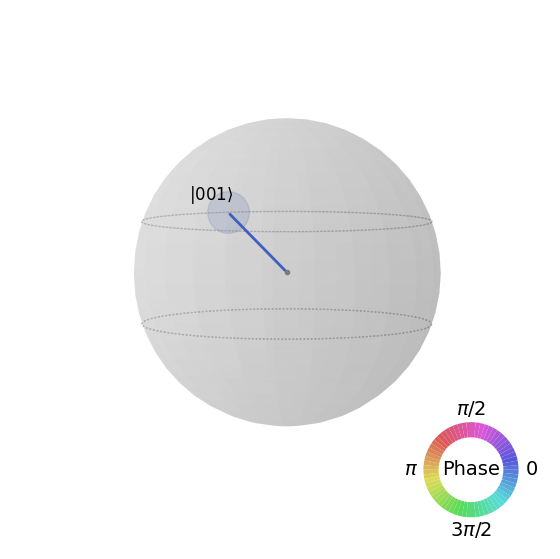

In [520]:
# Get the output state vector (Qsphere)
qvis.plot_state_qsphere(out_state)

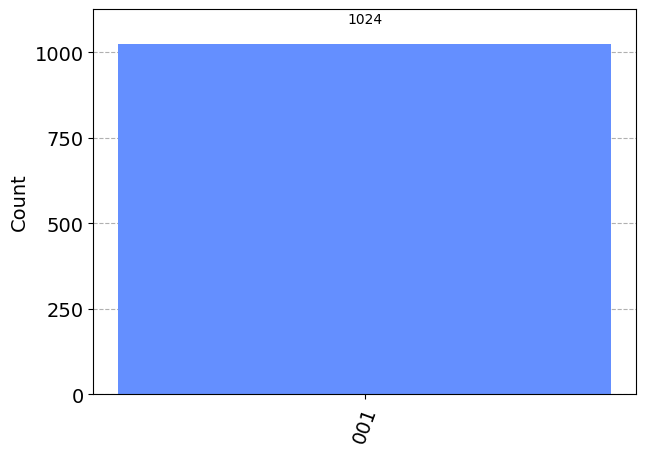

In [521]:
# Returns counts
counts = result.get_counts()
qvis.plot_histogram(counts)

# Exercise 8

Generate a random superposition state $|\psi\rangle$ using `random_statevector()` and visualize it in the Bloch sphere.

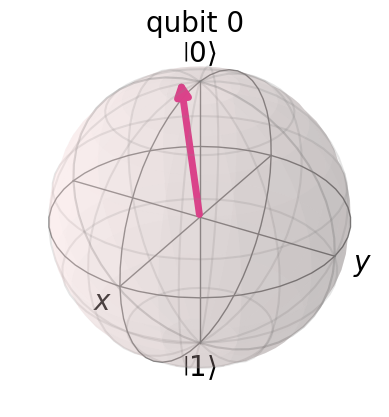

In [522]:
psi_0 = qi.random_statevector(2) # Random state initialization
qvis.plot_bloch_multivector(psi_0)

In [523]:
psi_0.draw('latex')

<IPython.core.display.Latex object>

Program a quantum circuit with a 1-qubit quantum register and also one classical register. Initialize your quantum circuit with the radom state as input for the quantum register. Add a barrier and a measurement after the circuit.

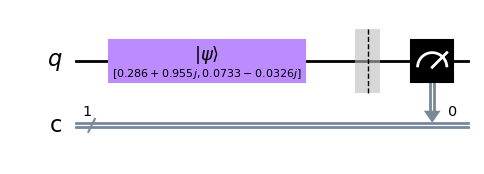

In [528]:
# 1. Program the quantum circuit
qc = QuantumCircuit(1, 1)
qc.initialize(psi_0)
qc.barrier()
qc.measure(0,0)
qc.draw(output='mpl')

Run the simulation and visualize the `out_vector` in the Bloch sphere and the count’s histogram.

In [529]:
# 2. Transpile for simulator
sim = Aer.get_backend('aer_simulator') # mimic the execution of an actual device
qc = transpile(qc, sim) # compile the circuit for simulation
qc.save_statevector() # To save the simulated output state

# 3. Run
result = sim.run(qc).result()

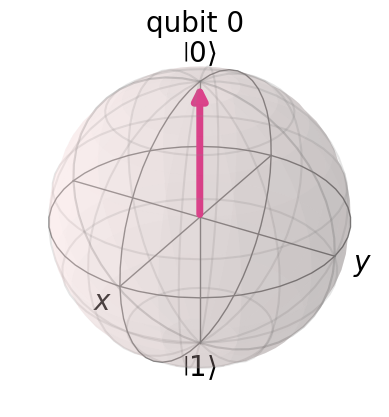

In [531]:
# Get the output state vector (Bloch Sphere)
out_state = result.get_statevector()
qvis.plot_bloch_multivector(out_state)

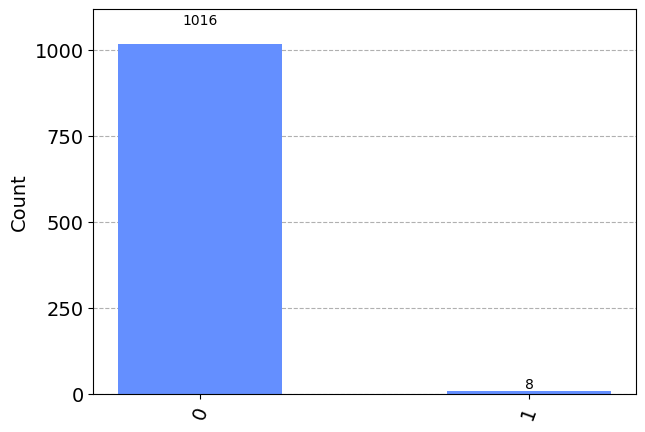

In [532]:
# Returns counts
counts = result.get_counts()
qvis.plot_histogram(counts)

Are the input vector, outing vector and histogram consistent with each other? What happens if you repeat the simulation?

> _=> Yes, the input is completely random and collapses into either the state $|0\rangle$ or the state $|1\rangle$ after measurement. The probability of the initial state $|\psi_0\rangle$ collapsing into the state $|0\rangle$ or $|1\rangle$ upon measurement in the standard basis is determined by its proximity to the corresponding pole on the Bloch sphere. This relationship between the initial state's proximity to the corresponding pole on the Bloch sphere and the measurement outcome became evident when we ran a simulation, which yielded counts for both the $|0\rangle$ and $|1\rangle$ states._

> _=> If we repeat the simulation, reinitializing the random state, we will end up with different counts depending on the initial state $|\psi_0\rangle$:_

Simulation => |0>: 634, |1>: 390


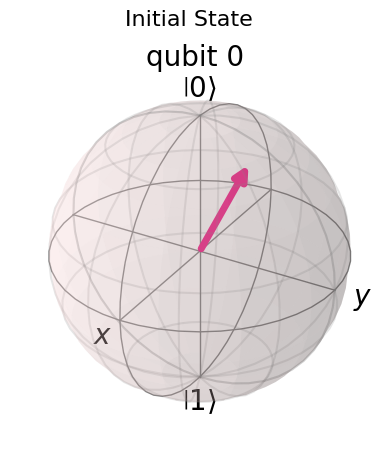

In [534]:
def repeatSimu():

    # 1. Program the quantum circuit
    psi_0 = qi.random_statevector(2) # Random state initialization
    qc = QuantumCircuit(1, 1)
    qc.initialize(psi_0)
    qc.measure(0,0)

    # 2. Transpile for simulator
    sim = Aer.get_backend('aer_simulator') # mimic the execution of an actual device
    qc = transpile(qc, sim) # compile the circuit for simulation
    qc.save_statevector() # To save the simulated output state

    # 3. Run
    result = sim.run(qc).result()
    out_state = result.get_statevector()
    counts = result.get_counts()

    return psi_0, out_state, counts

psi_0, out_state, counts = repeatSimu()
print('Simulation => |0>: {}, |1>: {}'.format(counts['0'], counts['1']))
qvis.plot_bloch_multivector(psi_0, title='Initial State')

# Exercise 9

Program a quantum teleportation circuit.

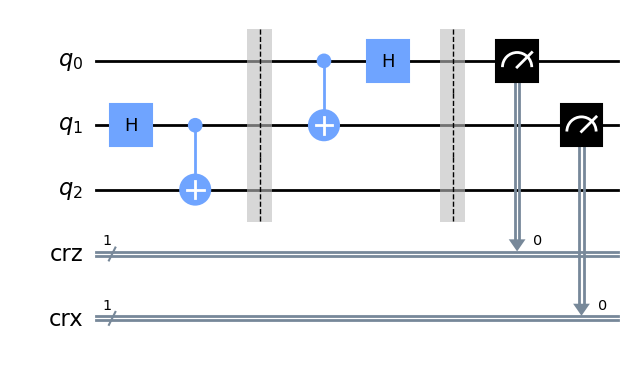

In [535]:
qr = qiskit.QuantumRegister(3, name='q')
crz, crx = qiskit.ClassicalRegister(1, name='crz'), qiskit.ClassicalRegister(1, name='crx')
teleportation_circuit = qiskit.QuantumCircuit(qr, crz, crx)

teleportation_circuit.h(1)
teleportation_circuit.cx(1,2)
teleportation_circuit.barrier(range(3))
teleportation_circuit.cx(0,1)
teleportation_circuit.h(0)
teleportation_circuit.barrier(range(3))
teleportation_circuit.measure(0, crz)
teleportation_circuit.measure(1, crx)

teleportation_circuit.draw(output='mpl')

Add conditional gates for Bob’s qubit ($q_2$), where the conditions are: if _crz=1_ apply _Z-gate_ to $q_2$ and/or if _crx=1_ apply _X-gate_ to $q_2$. The resulting circtions are if crz=1 apply Zgate to q 2 and/or if crx=1 apply X-gate to q2 . The resulting circuit is:

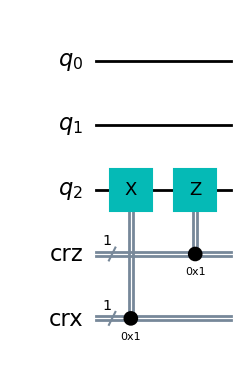

In [536]:
condition_xz_circuit = qiskit.QuantumCircuit(qr, crz, crx)

condition_xz_circuit.x(2).c_if(crx, 1)
condition_xz_circuit.z(2).c_if(crz, 1)

condition_xz_circuit.draw(output='mpl')

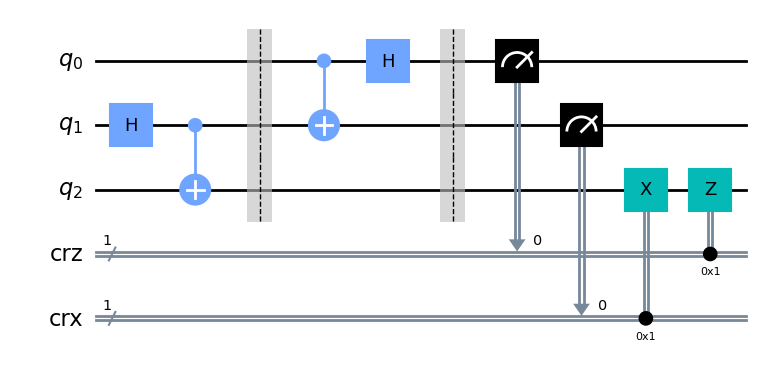

In [538]:
# The complete circuit
qc = teleportation_circuit.compose(condition_xz_circuit)
qc.draw(output='mpl')

Then initialize $q_0$ with a random superposition state and run the simulation. Is teleportation achieved?

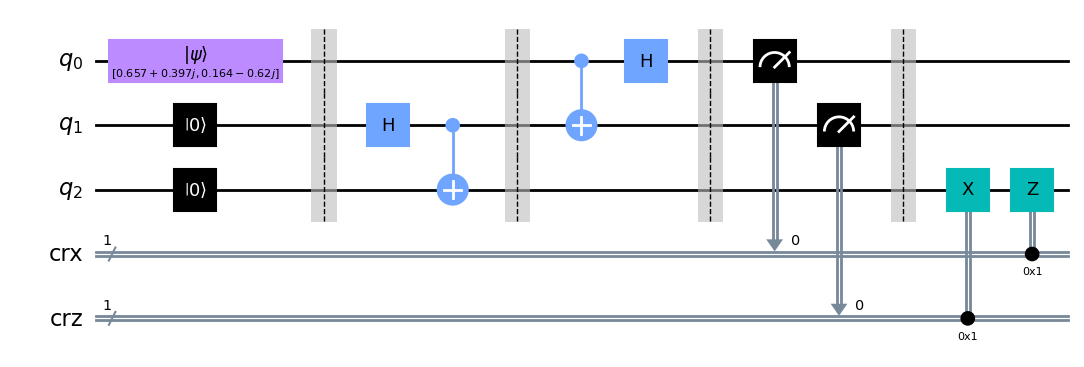

In [539]:
init_circuit = qiskit.QuantumCircuit(qr, crx, crz)

psi_0 = qi.random_statevector(2) # Random state initialization
init_circuit.initialize(psi_0, 0)
init_circuit.reset(range(1,3))
init_circuit.barrier(range(3))

qc = init_circuit.compose(teleportation_circuit)
qc.barrier()
qc = qc.compose(condition_xz_circuit)

qc.draw('mpl')

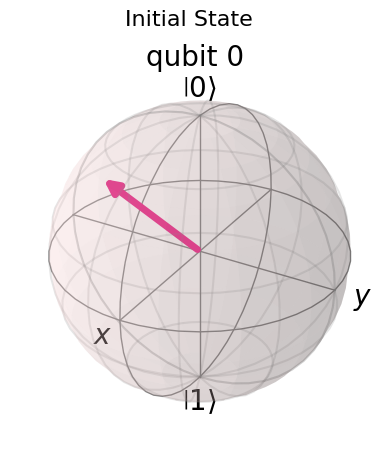

In [540]:
qvis.plot_bloch_multivector(psi_0, title='Initial State')

In [541]:
psi_0.draw('latex')

<IPython.core.display.Latex object>

> _=> Let's simulate the final quantum state of our circuit._

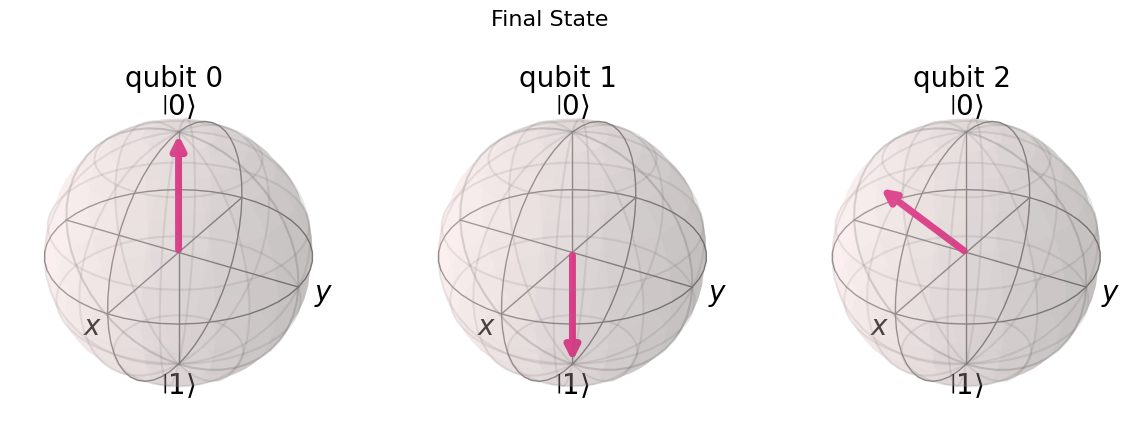

In [542]:
simu = Aer.get_backend('statevector_simulator') # Simulate quantum states
job = simu.run(qc)
result = job.result()
out_state = result.get_statevector(qc)
qvis.plot_bloch_multivector(out_state, title='Final State')

In [543]:
out_state.draw('latex')

<IPython.core.display.Latex object>

> _=> Yes! We verified graphically and numerically that this quantum circuit represents a quantum teleportation protocol._